#  Data Wrangling, Cleaning and Exploratory Data Analysis

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/dl/data' 

/content/drive/.shortcut-targets-by-id/1ZyNJXaTInYA2YPBLOAFnql__PhYO31aJ/data


In [ ]:
import numpy as np
import pandas as pd
import pickle as pkl
from tabulate import tabulate
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from urllib.parse import urlsplit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Wrangling and Cleaning

### Exploring hubspot_export.csv

In [ ]:
Columns = ['Contact ID', 'Became a Lead Date', 'Became a Subscriber Date', 'First Conversion Date', 'First marketing email click date', 'First marketing email open date', 'First marketing email send date', 'Last marketing email click date', 'Last marketing email name', 'Last marketing email open date', 'Last marketing email send date', 'Average Pageviews', 'First Page Seen', 'Last Page Seen', 'Number of Pageviews', 'Number of Sessions', 'Marketing emails opened','Marketing emails delivered', 'Marketing emails clicked', 'Opted out of email: Events and Community', 'Opted out of email: Program Announcements', 'Opted out of email: The Batch', 'Unsubscribed from all email', 'Which of the following online courses have you taken from deeplearning.ai?', 'Last Registered Event', 'Last Registered Event Date', 'Highest level of completed education', 'Job Title or Function', 'IP Country', 'Associated Company ID']

In [ ]:
data_types = {'Contact ID':int, 'Associated Company ID': object} 

In [ ]:
df_hub_spot = pd.read_csv('hubspot_export.csv',usecols=Columns, dtype=data_types, parse_dates = True)

In [ ]:
df_hub_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336955 entries, 0 to 336954
Data columns (total 30 columns):
 #   Column                                                                      Non-Null Count   Dtype  
---  ------                                                                      --------------   -----  
 0   Contact ID                                                                  336955 non-null  int64  
 1   Became a Lead Date                                                          89826 non-null   object 
 2   Became a Subscriber Date                                                    230453 non-null  object 
 3   First Conversion Date                                                       89822 non-null   object 
 4   First marketing email click date                                            140535 non-null  object 
 5   First marketing email open date                                             297928 non-null  object 
 6   First marketing email send date     

In [ ]:
# Converting all timestamp columns into Datetime type
df_hub_spot['First Conversion Date'] = pd.to_datetime(df_hub_spot['First Conversion Date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Became a Lead Date'] = pd.to_datetime(df_hub_spot['Became a Lead Date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Became a Subscriber Date'] = pd.to_datetime(df_hub_spot['Became a Subscriber Date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['First marketing email click date'] = pd.to_datetime(df_hub_spot['First marketing email click date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['First marketing email open date'] = pd.to_datetime(df_hub_spot['First marketing email open date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['First marketing email send date'] = pd.to_datetime(df_hub_spot['First marketing email send date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Last marketing email click date'] = pd.to_datetime(df_hub_spot['Last marketing email click date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Last marketing email open date'] = pd.to_datetime(df_hub_spot['Last marketing email open date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Last marketing email send date'] = pd.to_datetime(df_hub_spot['Last marketing email send date'], format='%Y-%m-%d %H:%M:%S')
df_hub_spot['Last Registered Event Date'] = pd.to_datetime(df_hub_spot['Last Registered Event Date'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
# Replacing Nans by Zeroes in columns associated to number of marketing emails opened/delivered/clicked and converting them from float to int
df_hub_spot['Marketing emails opened'] = df_hub_spot['Marketing emails opened'].fillna(0)
df_hub_spot['Marketing emails opened'] = df_hub_spot['Marketing emails opened'].astype(int, errors='raise')
df_hub_spot['Marketing emails delivered'] = df_hub_spot['Marketing emails delivered'].fillna(0)
df_hub_spot['Marketing emails delivered'] = df_hub_spot['Marketing emails delivered'].astype(int, errors='raise')
df_hub_spot['Marketing emails clicked'] = df_hub_spot['Marketing emails clicked'].fillna(0)
df_hub_spot['Marketing emails clicked'] = df_hub_spot['Marketing emails clicked'].astype(int, errors='raise')
df_hub_spot['Average Pageviews'] = df_hub_spot['Average Pageviews'].fillna(0)
df_hub_spot['Average Pageviews'] = df_hub_spot['Average Pageviews'].astype(int, errors='raise')

In [ ]:
# Replacing NaNs from 'First Page Seen', 'Last Page Seen' and Last Registered Event by 'None'
df_hub_spot['First Page Seen'] = df_hub_spot['First Page Seen'].fillna('None')
df_hub_spot['Last Page Seen'] = df_hub_spot['Last Page Seen'].fillna('None')
df_hub_spot['Last Registered Event'] = df_hub_spot['Last Registered Event'].fillna('None')

In [ ]:
# Mapping entries associated with 'opt out of emails" into '0' (no opt out when applicable/subscribed) and '1' (opt out)
Dict_Opt={'No':0, 'Yes':1}
Dict_Opt2={False:0, True:1}
df_hub_spot['Opted out of email: Events and Community'] = df_hub_spot['Opted out of email: Events and Community'].fillna('No')
df_hub_spot['Opted out of email: Events and Community'] = df_hub_spot['Opted out of email: Events and Community'].map(Dict_Opt)
df_hub_spot['Opted out of email: Events and Community'] = df_hub_spot['Opted out of email: Events and Community'].astype(int, errors='raise')
df_hub_spot['Opted out of email: Program Announcements'] = df_hub_spot['Opted out of email: Program Announcements'].fillna('No')
df_hub_spot['Opted out of email: Program Announcements'] = df_hub_spot['Opted out of email: Program Announcements'].map(Dict_Opt)
df_hub_spot['Opted out of email: Program Announcements'] = df_hub_spot['Opted out of email: Program Announcements'].astype(int, errors='raise')
df_hub_spot['Opted out of email: The Batch'] = df_hub_spot['Opted out of email: The Batch'].fillna('No')
df_hub_spot['Opted out of email: The Batch'] = df_hub_spot['Opted out of email: The Batch'].map(Dict_Opt)
df_hub_spot['Opted out of email: The Batch'] = df_hub_spot['Opted out of email: The Batch'].astype(int,int, errors='raise')
df_hub_spot['Unsubscribed from all email'] = df_hub_spot['Unsubscribed from all email'].fillna(False)
df_hub_spot['Unsubscribed from all email'] = df_hub_spot['Unsubscribed from all email'].map(Dict_Opt2)
df_hub_spot['Unsubscribed from all email'] = df_hub_spot['Unsubscribed from all email'].astype(int, errors='raise')

In [ ]:
df_hub_spot['First Page Seen Scheme'],df_hub_spot['First Page Netloc'], df_hub_spot['First Page Seen Path'], df_hub_spot['First Page Seen Query'], df_hub_spot['First Page Seen Fragment']  = zip(*df_hub_spot['First Page Seen'].map(urlsplit))
df_hub_spot['Last Page Seen Scheme'],df_hub_spot['Last Page Netloc'], df_hub_spot['Last Page Seen Path'], df_hub_spot['Last Page Seen Query'], df_hub_spot['Last Page Seen Fragment']  = zip(*df_hub_spot['Last Page Seen'].map(urlsplit))

In [ ]:
df_hub_spot = df_hub_spot.drop(columns=['First Page Seen Scheme','First Page Seen Query', 'First Page Seen Fragment','Last Page Seen Scheme','Last Page Seen Query', 'Last Page Seen Fragment', ])

In [ ]:
df_hub_spot['First Page Netloc'].unique()

array(['blog.deeplearning.ai', 'www.deeplearning.ai', '',
       'info.deeplearning.ai', 'share.hsforms.com',
       'translate.googleusercontent.com', 'deeplearning.ai',
       'webcache.googleusercontent.com', 'deeplearningaio.github.io',
       'test.deeplearning.gfolkdev.net', 'hs-5871640.s.hubspotemail.net',
       '5871640.hs-sites.com'], dtype=object)

In [ ]:
df_hub_spot.groupby(df_hub_spot['First Page Netloc'])['Contact ID'].count()

First Page Netloc
                                   236260
5871640.hs-sites.com                    1
blog.deeplearning.ai                 3598
deeplearning.ai                         1
deeplearningaio.github.io               1
hs-5871640.s.hubspotemail.net           2
info.deeplearning.ai                  385
share.hsforms.com                     555
test.deeplearning.gfolkdev.net          6
translate.googleusercontent.com         8
webcache.googleusercontent.com          1
www.deeplearning.ai                 96137
Name: Contact ID, dtype: int64

In [ ]:
mask = ~(df_hub_spot['First Page Netloc']=='blog.deeplearning.ai') | (df_hub_spot['First Page Netloc']== 'www.deeplearning.ai') | (df_hub_spot['First Page Netloc']=='info.deeplearning.ai') | (df_hub_spot['First Page Netloc']== 'deeplearning.ai')

In [ ]:
df_hub_spot['First Page Seen Path'].mask(mask,'None', inplace=True)
len(df_hub_spot['First Page Seen Path'].unique())

77

In [ ]:
mask = ~(df_hub_spot['Last Page Netloc']=='blog.deeplearning.ai') | (df_hub_spot['Last Page Netloc']== 'www.deeplearning.ai') | (df_hub_spot['Last Page Netloc']=='info.deeplearning.ai') | (df_hub_spot['Last Page Netloc']== 'deeplearning.ai')

In [ ]:
df_hub_spot['Last Page Seen Path'].mask(mask,'None', inplace=True)
len(df_hub_spot['Last Page Seen Path'].unique())

98

In [ ]:
df_hub_spot = df_hub_spot.drop(columns=['First Page Seen', 'First Page Netloc','Last Page Seen','Last Page Netloc'])

In [ ]:
List_of_First_Pages = list(df_hub_spot['First Page Seen Path'].unique())

In [ ]:
# Creating a Dictionary of First Page Seen Path and mapping all unique column entries into numbers
i=0
First_Pages_Dict={}
for e in List_of_First_Pages:
  First_Pages_Dict[e]=i
  i=i+1
df_hub_spot['First Page Seen Path'] = df_hub_spot['First Page Seen Path'].map(First_Pages_Dict)
df_hub_spot['First Page Seen Path'] = df_hub_spot['First Page Seen Path'].astype(int, errors='raise')

In [ ]:
# Creating a Dictionary of Last Page Seen Path and mapping all unique column entries into numbers
List_of_Last_Pages = list(df_hub_spot['Last Page Seen Path'].unique())
i=0
Last_Pages_Dict={}
for e in List_of_Last_Pages:
  First_Pages_Dict[e]=i
  i=i+1
df_hub_spot['Last Page Seen Path'] = df_hub_spot['Last Page Seen Path'].map(First_Pages_Dict)
df_hub_spot['Last Page Seen Path'] = df_hub_spot['Last Page Seen Path'].astype(int, errors='raise')

In [ ]:
# Replacing NaNs from 'Last marketing email name' by 'None'
df_hub_spot['Last marketing email name'] = df_hub_spot['Last marketing email name'].fillna('None')
# Creating a Dictionary of Email Names from 'Last marketing email name' and mapping all column entries into numbers
List_of_Email_Names = list(df_hub_spot['Last marketing email name'].unique())
i=0
Email_Names_Dict={}
for e in List_of_Email_Names:
  Email_Names_Dict[e]=i
  i=i+1
df_hub_spot['Last marketing email name'] = df_hub_spot['Last marketing email name'].map(Email_Names_Dict)
df_hub_spot['Last marketing email name'] = df_hub_spot['Last marketing email name'].astype(int, errors='raise')

In [ ]:
List_of_Events = list(df_hub_spot['Last Registered Event'].unique())

In [ ]:
List_of_Events

['None',
 'Pie & AI: Dubai - AI Around the World - Episode 1: MENA',
 'Pie & AI: Istanbul - Deep Dive into AI',
 'Pie & AI: Real-World Reinforcement Learning: Challenges & Opportunities',
 'Pie & AI: Islamabad- Neural Networks workshop',
 'Pie & AI: Bengalore - Computer Vision Workshop',
 'Pie & AI: Newport News - Front Line Use Cases of Clinical NLP and AI',
 'Pie & AI: Hyderabad - AI Resolution 2021',
 'Pie & AI: Cairo - Robotics , Autonomous and Self Driving Cars',
 'Pie & AI: Chicago - AI Product Management with Stefan Hermanek',
 'Pie & AI: Cairo - Computer Vision & Deep Learning',
 'Pie & AI: Cairo-NLP / ChatBots / Recommendation System / Speech Recognition',
 'Pie & AI:  Cairo - Data Science / Big Data / Machine Learning',
 'Pie & AI: Henderson - An Introduction to Transfer Learning',
 'Pie & AI: Cairo - Introduction to AI',
 'Pie & AI: Bengalore - Breaking into AI',
 'Pie & AI: Moscow - When You Need a Crowd for ML/DL Projects: Toloka.ai',
 'Pie & AI: Dubai - Communication Skil

In [ ]:
# Creating a Dictionary of Events from 'Last Registered Event' and mapping all column entries into numbers
List_of_Events = list(df_hub_spot['Last Registered Event'].unique())
i=0
Events_Dict={}
for e in List_of_Events:
  Events_Dict[e]=i
  i=i+1
df_hub_spot['Last Registered Event'] = df_hub_spot['Last Registered Event'].map(Events_Dict)
df_hub_spot['Last Registered Event'] = df_hub_spot['Last Registered Event'].astype(int, errors='raise')

In [ ]:
List_of_Events

['None',
 'Pie & AI: Dubai - AI Around the World - Episode 1: MENA',
 'Pie & AI: Istanbul - Deep Dive into AI',
 'Pie & AI: Real-World Reinforcement Learning: Challenges & Opportunities',
 'Pie & AI: Islamabad- Neural Networks workshop',
 'Pie & AI: Bengalore - Computer Vision Workshop',
 'Pie & AI: Newport News - Front Line Use Cases of Clinical NLP and AI',
 'Pie & AI: Hyderabad - AI Resolution 2021',
 'Pie & AI: Cairo - Robotics , Autonomous and Self Driving Cars',
 'Pie & AI: Chicago - AI Product Management with Stefan Hermanek',
 'Pie & AI: Cairo - Computer Vision & Deep Learning',
 'Pie & AI: Cairo-NLP / ChatBots / Recommendation System / Speech Recognition',
 'Pie & AI:  Cairo - Data Science / Big Data / Machine Learning',
 'Pie & AI: Henderson - An Introduction to Transfer Learning',
 'Pie & AI: Cairo - Introduction to AI',
 'Pie & AI: Bengalore - Breaking into AI',
 'Pie & AI: Moscow - When You Need a Crowd for ML/DL Projects: Toloka.ai',
 'Pie & AI: Dubai - Communication Skil

In [ ]:
# Creating a Dictionary of Levels of Completed Education and mapping all 'Highest level of completed education' column entries into numbers
df_hub_spot['Highest level of completed education'] = df_hub_spot['Highest level of completed education'].fillna(str('None'))
ed_list = list(df_hub_spot['Highest level of completed education'].unique())
Education_Dict={}
j=0
for i in ed_list:
  Education_Dict[i] = j
  j=j+1 
df_hub_spot['Highest level of completed education'] = df_hub_spot['Highest level of completed education'].map(Education_Dict)
df_hub_spot['Highest level of completed education'] = df_hub_spot['Highest level of completed education'].astype(int, errors='raise')

In [ ]:
# Creating a Dictionary of Job Titles or Functions and mapping all 'Job Title or Function' column entries into numbers
df_hub_spot['Job Title or Function'] = df_hub_spot['Job Title or Function'].fillna(str('None'))
jobs_list = list(df_hub_spot['Job Title or Function'].unique())
Jobs_Dict={}
j=0
for i in jobs_list:
  Jobs_Dict[i] = j
  j=j+1 
df_hub_spot['Job Title or Function'] = df_hub_spot['Job Title or Function'].map(Jobs_Dict)
df_hub_spot['Job Title or Function'] = df_hub_spot['Job Title or Function'].astype(int, errors='raise')

In [ ]:
# Creating a Dictionary of Countries and mapping all 'IP Country' column entries into numbers
df_hub_spot['IP Country'] = df_hub_spot['IP Country'].fillna(str('None'))
countries_list = list(df_hub_spot['IP Country'].unique())
Countries_Dict={}
j=0
for i in countries_list:
  Countries_Dict[i] = j
  j=j+1 
df_hub_spot['IP Country'] = df_hub_spot['IP Country'].map(Countries_Dict)
df_hub_spot['IP Country'] = df_hub_spot['IP Country'].astype(int, errors='raise')

In [ ]:
# Creating a Dictionary of Company IDs and mapping all 'Company ID' column entries into numbers
df_hub_spot['Associated Company ID'] = df_hub_spot['Associated Company ID'].fillna('None')
companies_list = list(df_hub_spot['Associated Company ID'].unique())
Companies_Dict={}
j=0
for i in companies_list:
  Companies_Dict[i] = j
  j=j+1 
df_hub_spot['Associated Company ID'] = df_hub_spot['Associated Company ID'].map(Companies_Dict)
df_hub_spot['Associated Company ID'] = df_hub_spot['Associated Company ID'].astype(int, errors='raise')

In [ ]:
# Checking all Contact IDs have Number of Pageviws and Sessions not null
df_hub_spot['Number of Pageviews'].isnull().sum()
df_hub_spot['Number of Sessions'].isnull().sum()

0

In [ ]:
df_hub_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336955 entries, 0 to 336954
Data columns (total 30 columns):
 #   Column                                                                      Non-Null Count   Dtype         
---  ------                                                                      --------------   -----         
 0   Contact ID                                                                  336955 non-null  int64         
 1   Became a Lead Date                                                          89826 non-null   datetime64[ns]
 2   Became a Subscriber Date                                                    230453 non-null  datetime64[ns]
 3   First Conversion Date                                                       89822 non-null   datetime64[ns]
 4   First marketing email click date                                            140535 non-null  datetime64[ns]
 5   First marketing email open date                                             297928 non-null  

In [ ]:
# Saving clean data set to a pickle file
df_hub_spot.to_pickle("./hub_spot_export_clean01272021.pkl")

In [ ]:
# Saving all dictionaries (categorical features) to a pickle file
All_Dicts = [Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict]
f = open("all_dictionaries.pkl","wb")
pkl.dump(All_Dicts,f)
f.close()

# Group of Interest 1 - "We know them!" 
# Creating a new data frame with Learners that voluntarily reported having taken any courses/specializations

In [ ]:
# Loading clean data set on a pickle file
df_hub_spot = pd.read_pickle("./data/hub_spot_export_clean01272021.pkl")

In [ ]:
import pickle as pkl
def Load_Dicts(pkl_filename):
  All_Dicts = pkl.load( open (pkl_filename, "rb"))
  Dict_Opt= All_Dicts[0]
  Events_Dict= All_Dicts[1]
  Education_Dict= All_Dicts[2]
  Jobs_Dict= All_Dicts[3]
  Countries_Dict = All_Dicts[4]
  Companies_Dict = All_Dicts[5]
  First_Pages_Dict = All_Dicts[6]
  Last_Pages_Dict = All_Dicts[7]
  return Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict

In [ ]:
# Loading all dictionaries (categorical features) from a pickle file
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict = Load_Dicts("./data/all_dictionaries.pkl")

In [ ]:
# Creating dataframe with paying students only
df_converted_students = df_hub_spot[df_hub_spot["Which of the following online courses have you taken from deeplearning.ai?"].notna()].copy()

In [ ]:
# Droping/reseting dataframe index
df_converted_students.reset_index(drop=True, inplace=True)

In [ ]:
# Creating dictionary with all DeepLearning.ai courses taken and voluntarily reported by Contact IDs
Courses_Dict = {"AI For Everyone":0, "Deep Learning Specialization":1, "Natural Language Processing Specialization":2, "AI for Medicine Specialization":3, "TensorFlow Developer Professional Certificate":4, "TensorFlow: Data and Deployment Specialization":5}
# Creating dictionary with duration in hours of each DeepLearning.ai course
Duration_Dict = {"AI For Everyone":6, "Deep Learning Specialization":80, "Natural Language Processing Specialization":96, "AI for Medicine Specialization":84, "TensorFlow Developer Professional Certificate":80, "TensorFlow: Data and Deployment Specialization":48}
# Creating a column for each course in the paying students dataframe
for k in Courses_Dict.keys():
  df_converted_students.insert(loc = df_converted_students.shape[1],column=str(k), value=0)
df_converted_students.insert(loc = df_converted_students.shape[1],column='Total Education Effort', value=0)

In [ ]:
# Reading list of strings (course names) from each Contact ID and updating corresponding paying students columns
Total_Courses=len(Courses_Dict)
course_list = df_converted_students['Which of the following online courses have you taken from deeplearning.ai?'].to_list()
course_matrix = np.zeros((df_converted_students.shape[0], Total_Courses+1))
i=0
for cl in course_list:
   cc = cl.split(';')
   for c in cc:
     course = c.lstrip().rstrip()
     course_matrix[i,Courses_Dict[course]] = 1
     course_matrix[i,Total_Courses] = course_matrix[i,Total_Courses] + Duration_Dict[course]
   i = i+1
for col in Courses_Dict.keys():
  df_converted_students[col]=pd.Series(course_matrix[:,Courses_Dict[col]]).astype(int, errors='raise')
df_converted_students['Total Education Effort']=pd.Series(course_matrix[:,Total_Courses]).astype(int, errors='raise')

+------------------------------------------------+-------------------+------------+
|                  Course Name                   | # Paying Students | % of Total |
+------------------------------------------------+-------------------+------------+
|                AI For Everyone                 |       2955        |    22.0    |
|          Deep Learning Specialization          |       10209       |    77.0    |
|   Natural Language Processing Specialization   |        95         |    1.0     |
|         AI for Medicine Specialization         |        91         |    1.0     |
| TensorFlow Developer Professional Certificate  |        92         |    1.0     |
| TensorFlow: Data and Deployment Specialization |        35         |    0.0     |
+------------------------------------------------+-------------------+------------+


<AxesSubplot:>

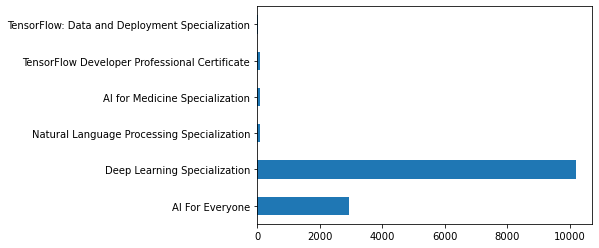

In [ ]:
prt_list=[]
for k in Courses_Dict.keys():
  prt_list.append((k, df_converted_students[str(k)].sum(), 100*round(df_converted_students[str(k)].sum()/df_converted_students.shape[0],2)))
print(tabulate(prt_list,headers=["Course Name", "# Paying Students", "% of Total"],tablefmt="pretty"))
df_converted_students[list(Courses_Dict.keys())].sum().plot(kind='barh')

In [ ]:
df_converted_students = df_converted_students.drop(columns=['Which of the following online courses have you taken from deeplearning.ai?'])

In [ ]:
df_converted_students['Longevity'] = df_converted_students['Last marketing email send date'] - df_converted_students['First marketing email send date']

In [ ]:
df_converted_students.drop(df_converted_students[df_converted_students['Longevity'].isnull()].index, inplace = True)

In [ ]:
df_converted_students['Longevity']=df_converted_students['Longevity'].dt.days

In [ ]:
df_converted_students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13183
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Contact ID                                      13026 non-null  int64         
 1   Became a Lead Date                              3296 non-null   datetime64[ns]
 2   Became a Subscriber Date                        6517 non-null   datetime64[ns]
 3   First Conversion Date                           3296 non-null   datetime64[ns]
 4   First marketing email click date                7127 non-null   datetime64[ns]
 5   First marketing email open date                 11427 non-null  datetime64[ns]
 6   First marketing email send date                 13026 non-null  datetime64[ns]
 7   Last marketing email click date                 7130 non-null   datetime64[ns]
 8   Last marketing email name                     

In [ ]:
# Saving Students data set to pickle file - All features are ready for analysis and selection!
df_converted_students.to_pickle("./data/converted_students02032021.pkl")

In [ ]:
# Saving all dictionaries (categorical features) to a pickle file
All_Dicts = [Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict]
f = open("./data/all_dictionaries.pkl","wb")
pkl.dump(All_Dicts,f)
f.close()

# Group of Interest 2 "We know something about them!" - Positive Conversion but No Information about Courses/Specializations Taken
# Creating a a new data frame with Contact ID that have a 'First Conversion Date' but did not disclose any information about any courses/specializations eventually taken

In [ ]:
# Loading clean data set on a pickle file
df_hub_spot = pd.read_pickle("./hub_spot_export_clean01272021.pkl")

In [ ]:
def Load_Dicts(pkl_filename):
  All_Dicts = pkl.load( open (pkl_filename, "rb"))
  Dict_Opt= All_Dicts[0]
  Events_Dict= All_Dicts[1]
  Education_Dict= All_Dicts[2]
  Jobs_Dict= All_Dicts[3]
  Countries_Dict = All_Dicts[4]
  Companies_Dict = All_Dicts[5]
  First_Pages_Dict = All_Dicts[6]
  Last_Pages_Dict = All_Dicts[7]
  return Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict

In [ ]:
# Loading all dictionaries (categorical features) from a pickle file
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict = Load_Dicts("all_dictionaries.pkl")

In [ ]:
mask = (df_hub_spot["Which of the following online courses have you taken from deeplearning.ai?"].isnull()) & (df_hub_spot['First Conversion Date'].notna())

In [ ]:
df_converted = df_hub_spot[mask].copy()

In [ ]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86499 entries, 0 to 336926
Data columns (total 30 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Contact ID                                                                  86499 non-null  int64         
 1   Became a Lead Date                                                          86498 non-null  datetime64[ns]
 2   Became a Subscriber Date                                                    10232 non-null  datetime64[ns]
 3   First Conversion Date                                                       86499 non-null  datetime64[ns]
 4   First marketing email click date                                            52738 non-null  datetime64[ns]
 5   First marketing email open date                                             76537 non-null  datetime6

In [ ]:
# Saving Converted Group of Interest 2 data set to pickle file 
df_converted.to_pickle("./converted_01282021.pkl")

# Group of Interest 3 "We don't know much about them" -  Not much information. No positive Conversion and no Information about Courses/Specializations Taken 
# Creating a a new data frame with Contact IDs that don't have 'First Conversion Date' and did not disclose information about any courses/specializations eventually taken

In [ ]:
# Loading clean data set on a pickle file
df_hub_spot = pd.read_pickle("./hub_spot_export_clean01272021.pkl")

In [ ]:
def Load_Dicts(pkl_filename):
  All_Dicts = pkl.load( open (pkl_filename, "rb"))
  Dict_Opt= All_Dicts[0]
  Events_Dict= All_Dicts[1]
  Education_Dict= All_Dicts[2]
  Jobs_Dict= All_Dicts[3]
  Countries_Dict = All_Dicts[4]
  Companies_Dict = All_Dicts[5]
  First_Pages_Dict = All_Dicts[6]
  Last_Pages_Dict = All_Dicts[7]
  return Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict

In [ ]:
# Loading all dictionaries (categorical features) from a pickle file
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict = Load_Dicts("./all_dictionaries.pkl")

In [ ]:
mask = (df_hub_spot["Which of the following online courses have you taken from deeplearning.ai?"].isnull()) & (df_hub_spot['First Conversion Date'].isna())

In [ ]:
df_a = df_hub_spot[df_hub_spot['First Conversion Date'].isna()]

In [ ]:
df_group3 = df_a[df_a["Which of the following online courses have you taken from deeplearning.ai?"].isnull()].copy()

In [ ]:
# Saving Converted Group of Interest 2 data set to pickle file 
df_group3.to_pickle("./group3_02052021.pkl")

# Appendix - Additional Data Exploration Analysis

### Exploring conversion history dates

In [ ]:
print("Conversion dates start at", df_hub_spot['First Conversion Date'].min(), " and end at", df_hub_spot['First Conversion Date'].max()," with a history of",  df_hub_spot['First Conversion Date'].max()- df_hub_spot['First Conversion Date'].min())

Conversion dates start at 2019-08-07 23:28:00  and end at 2021-01-04 11:28:00  with a history of 515 days 12:00:00


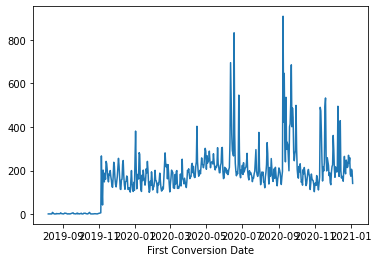

In [ ]:
# Creating a Pandas Series with Conversion History (Date, Total Contact IDs)
conv_hist = df_hub_spot.groupby(df_hub_spot['First Conversion Date'].dt.date, dropna=True)['Contact ID'].count()
conv_hist.plot(kind='line')

In [ ]:
Num_Total_Contacts = df_hub_spot['Contact ID'].notna().count()
Num_Total_Conversions = df_hub_spot['First Conversion Date'].count()
Conversion_Ratio = round(100*(Num_Total_Conversions/Num_Total_Contacts),2)
print("During this period of time, a total of", Num_Total_Conversions, "contacts out of", Num_Total_Contacts, "total contacts had an initial conversion with a conversion ratio of", Conversion_Ratio,"%")

During this period of time, a total of 89822 contacts out of 336955 total contacts had an initial conversion with a conversion ratio of 26.66 %


In [ ]:
conv_hist.describe()

count    480.000000
mean     187.129167
std      113.124702
min        1.000000
25%      139.000000
50%      182.000000
75%      223.000000
max      908.000000
Name: Contact ID, dtype: float64

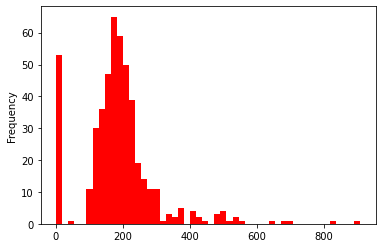

In [ ]:
conv_hist.plot(kind='hist', bins=50,cmap='hsv')

#### There are 11 dates of interest when total conversion/day is higher that 500. Any special events happened around those dates?

In [ ]:
conv_hist[conv_hist > 500]

First Conversion Date
2020-06-11    695
2020-06-12    516
2020-06-17    832
2020-06-25    546
2020-09-08    908
2020-09-10    646
2020-09-13    536
2020-09-21    506
2020-09-22    685
2020-11-19    533
Name: Contact ID, dtype: int64

#### And a period of time early in the data series when daily conversion rates where 1 (one)

In [ ]:
conv_hist[conv_hist == 1]

First Conversion Date
2019-08-07    1
2019-08-08    1
2019-08-13    1
2019-08-17    1
2019-08-18    1
2019-08-19    1
2019-08-20    1
2019-09-01    1
2019-09-02    1
2019-09-08    1
2019-09-10    1
2019-09-12    1
2019-09-13    1
2019-09-23    1
2019-09-26    1
2019-09-29    1
2019-10-03    1
2019-10-05    1
2019-10-12    1
2019-10-13    1
2019-10-18    1
2019-10-20    1
2019-10-22    1
2019-10-29    1
Name: Contact ID, dtype: int64

### Exploring subscription history

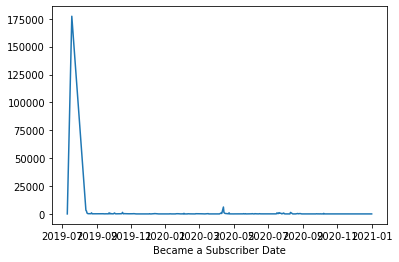

In [ ]:
# Creating a Pandas Series with Subscription History (Date, Total Contact IDs)
subs_hist = df_hub_spot.groupby(df_hub_spot['Became a Subscriber Date'].dt.date, dropna=True)['Contact ID'].count()
subs_hist.plot(kind='line')

#### A significant number of Contact IDs became subscribers (177259) on single date 2019-07-19. Is it an initial load of subscribers from another website or CRM system?

In [ ]:
# A significant number of Contact IDs became subscribers (177259) on single date 2019-07-19.
subs_hist[subs_hist > 177000]

Became a Subscriber Date
2019-07-19    177259
Name: Contact ID, dtype: int64

In [ ]:
temp = subs_hist[subs_hist < 177000]

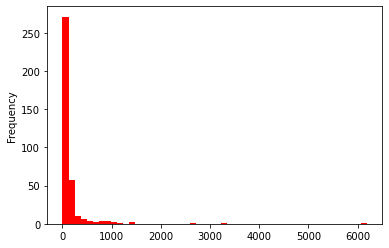

In [ ]:
temp.plot(kind='hist', bins=50,cmap='hsv')

In [ ]:
df_hub_spot['Average Pageviews'].describe()

count    336955.000000
mean          0.537505
std           1.312980
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          88.000000
Name: Average Pageviews, dtype: float64

### Exploring statistics on marketing emails data

In [ ]:
delivered = df_hub_spot[df_hub_spot['Marketing emails delivered'] > 0].copy()

In [ ]:
delivered.shape[0]

320160

In [ ]:
delivered['Marketing emails open ratio'] = delivered['Marketing emails opened'] / delivered['Marketing emails delivered']

In [ ]:
delivered['Marketing emails open ratio'].describe()

count    320160.000000
mean          0.386999
std           0.337734
min           0.000000
25%           0.130952
50%           0.305882
75%           0.606061
max          69.000000
Name: Marketing emails open ratio, dtype: float64

In [ ]:
open_ratio_dist = delivered.groupby(delivered['Marketing emails open ratio'])['Contact ID'].count()

In [ ]:
print('Marketing emails average open ratio is', round(100*delivered['Marketing emails open ratio'].mean(),2),"%")
print(open_ratio_dist[0],'Contact IDs did not open any marketing emails sent to them, corresponding to', round(100*(open_ratio_dist[0]/delivered.shape[0]),2),'% of the total', delivered.shape[0])

Marketing emails average open ratio is 38.7 %
22131 Contact IDs did not open any marketing emails sent to them, corresponding to 6.91 % of the total 320160


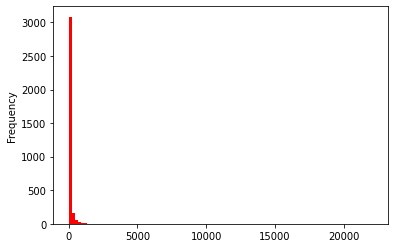

In [ ]:
open_ratio_dist.plot(kind='hist',bins=100, cmap='hsv')

In [ ]:
opened = delivered[delivered['Marketing emails opened'] > 0].copy()

In [ ]:
click_ratio_dist= opened ['Marketing emails clicked'] / opened['Marketing emails opened']


In [ ]:
click_ratio_dist.describe()

count    298029.000000
mean          0.119526
std           0.256737
min           0.000000
25%           0.000000
50%           0.000000
75%           0.111111
max          30.000000
dtype: float64

In [ ]:
zero_clicks = click_ratio_dist[click_ratio_dist == 0].count()

In [ ]:
print(zero_clicks,"Contact IDs did not click on any marketing emails they opened, representing a", round(100*zero_clicks/click_ratio_dist.shape[0],2),'% of ', click_ratio_dist.shape[0],' Contact IDs')

157385 Contact IDs did not click on any marketing emails they opened, representing a 52.81 % of  298029  Contact IDs


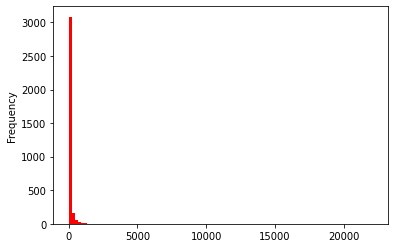

In [ ]:
open_ratio_dist.plot(kind='hist',bins=100, cmap='hsv')

In [ ]:
df_hub_spot.groupby(df_hub_spot['Highest level of completed education'])['Contact ID'].count()

Highest level of completed education
0    336589
1       112
2       139
3        49
4        10
5        51
6         5
Name: Contact ID, dtype: int64

In [ ]:
Education_Dict

{"Associate's degree": 6,
 'Doctoral Degree': 3,
 'High School or equivalent': 5,
 "Master's degree": 2,
 'None': 0,
 'Undergraduate degree': 1,
 'Vocational/Technical certificate or degree': 4}

In [ ]:
temp

Became a Subscriber Date
2019-07-11       1
2019-08-13    3326
2019-08-14    2628
2019-08-15     808
2019-08-16     386
              ... 
2020-12-27       1
2020-12-28       5
2020-12-30       2
2020-12-31       1
2021-01-01       1
Name: Contact ID, Length: 366, dtype: int64

In [ ]:
Jobs_Dict

{'Consulting': 2,
 'Data Analyst': 11,
 'Data Scientist': 4,
 'Educator/Teacher/Professor': 8,
 'Entrepreneur': 1,
 'Finance': 16,
 'General Management / Executive': 14,
 'Hardware Engineer': 15,
 'Healthcare Professional': 12,
 'Human Resource Professional': 17,
 'Legal/Law Professional': 19,
 'Machine Learning Engineer': 6,
 'Machine Learning Researcher': 9,
 'Marketing / PR / Sales': 13,
 'None': 0,
 'Other': 3,
 'Product Management': 18,
 'Software Engineer': 5,
 'Software Engineer - Machine Learning': 7,
 'Student': 10}

In [ ]:
df_hub_spot.groupby(df_hub_spot['Job Title or Function'])['Contact ID'].count()

Job Title or Function
0     303833
1        789
2        801
3       2356
4       8377
5       5294
6       5704
7       2187
8       1284
9       2788
10       543
11      1216
12       280
13        75
14       118
15       320
16       364
17        50
18       539
19        37
Name: Contact ID, dtype: int64

In [ ]:
cc = df_hub_spot.groupby(df_hub_spot['IP Country'])['Contact ID'].count()

In [ ]:
cc[cc>5000]

IP Country
0      29260
1      66838
4       9561
6     113687
9       9420
12      5142
17      5312
21      7614
35      7657
Name: Contact ID, dtype: int64